In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [36]:
path = 'site-logs/session-logs.csv'

In [37]:
data = pd.read_csv(path, header=None, names=['username', 'date', 'hourminute', 'action'])
data

,username,date,hourminute,action
0,john.doe@gmail.com,2015-03-01,4:30,in
1,bill@yahoo.com,2015-03-01,4:35,out
2,christina@gmail.com,2015-03-01,4:36,out
3,john.doe@gmail.com,2015-03-01,4:45,out
4,bill@yahoo.com,2015-03-01,4:50,out
5,john.doe@gmail.com,2015-03-02,5:30,out
6,john.doe@gmail.com,2015-03-02,5:45,out
7,john.doe@gmail.com,2015-03-02,6:00,in
8,john.doe@gmail.com,2015-03-02,7:30,out
9,christina@gmail.com,2015-03-02,18:00,out


In [38]:
print(data['action'].unique())
print(data['action'].value_counts())
print(data['username'].unique())

['in' 'out']
out    15
in      8
Name: action, dtype: int64
['john.doe@gmail.com' 'bill@yahoo.com' 'christina@gmail.com'
 'jay@gmail.com']


In [39]:
# No of times the different users have logged out in the above data set

In [40]:
d1 = data[['username', 'action']]
d1.head(10)

,username,action
0,john.doe@gmail.com,in
1,bill@yahoo.com,out
2,christina@gmail.com,out
3,john.doe@gmail.com,out
4,bill@yahoo.com,out
5,john.doe@gmail.com,out
6,john.doe@gmail.com,out
7,john.doe@gmail.com,in
8,john.doe@gmail.com,out
9,christina@gmail.com,out


In [41]:
d2 = d1[d1['action'] == 'out']
d2

,username,action
1,bill@yahoo.com,out
2,christina@gmail.com,out
3,john.doe@gmail.com,out
4,bill@yahoo.com,out
5,john.doe@gmail.com,out
6,john.doe@gmail.com,out
8,john.doe@gmail.com,out
9,christina@gmail.com,out
10,bill@yahoo.com,out
11,bill@yahoo.com,out


In [42]:
d3 = d2['username']
d3

1          bill@yahoo.com
2     christina@gmail.com
3      john.doe@gmail.com
4          bill@yahoo.com
5      john.doe@gmail.com
6      john.doe@gmail.com
8      john.doe@gmail.com
9     christina@gmail.com
10         bill@yahoo.com
11         bill@yahoo.com
13         bill@yahoo.com
15         bill@yahoo.com
16    christina@gmail.com
20     john.doe@gmail.com
22          jay@gmail.com
Name: username, dtype: object

In [43]:
d4 = d3.value_counts()
d4

bill@yahoo.com         6
john.doe@gmail.com     5
christina@gmail.com    3
jay@gmail.com          1
Name: username, dtype: int64

<AxesSubplot:>

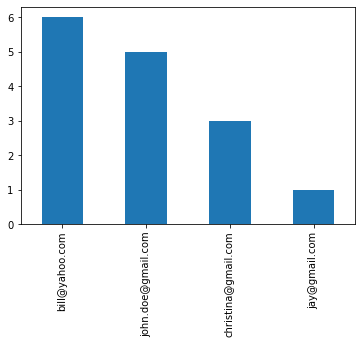

In [44]:
d4.plot(kind='bar')

In [45]:
# No of times the different users have logged in and out in the above data set

In [46]:
d1

,username,action
0,john.doe@gmail.com,in
1,bill@yahoo.com,out
2,christina@gmail.com,out
3,john.doe@gmail.com,out
4,bill@yahoo.com,out
5,john.doe@gmail.com,out
6,john.doe@gmail.com,out
7,john.doe@gmail.com,in
8,john.doe@gmail.com,out
9,christina@gmail.com,out


In [55]:
d5 = d1.copy()
d5['total'] = 1
d5.head(10)

,username,action,total
0,john.doe@gmail.com,in,1
1,bill@yahoo.com,out,1
2,christina@gmail.com,out,1
3,john.doe@gmail.com,out,1
4,bill@yahoo.com,out,1
5,john.doe@gmail.com,out,1
6,john.doe@gmail.com,out,1
7,john.doe@gmail.com,in,1
8,john.doe@gmail.com,out,1
9,christina@gmail.com,out,1


In [48]:
d6 = d5.groupby(['username', 'action'])
d6

In [49]:
d7 = d6.sum()
d7

total
username            action       
bill@yahoo.com      in          1
                    out         6
christina@gmail.com in          2
                    out         3
jay@gmail.com       in          1
                    out         1
john.doe@gmail.com  in          4
                    out         5

In [50]:
d7.index

MultiIndex([(     'bill@yahoo.com',  'in'),
            (     'bill@yahoo.com', 'out'),
            ('christina@gmail.com',  'in'),
            ('christina@gmail.com', 'out'),
            (      'jay@gmail.com',  'in'),
            (      'jay@gmail.com', 'out'),
            ( 'john.doe@gmail.com',  'in'),
            ( 'john.doe@gmail.com', 'out')],
           names=['username', 'action'])

In [51]:
d8 = d7.unstack()
d8

total    
action                 in out
username                     
bill@yahoo.com          1   6
christina@gmail.com     2   3
jay@gmail.com           1   1
john.doe@gmail.com      4   5

In [52]:
d8.index

Index(['bill@yahoo.com', 'christina@gmail.com', 'jay@gmail.com',
       'john.doe@gmail.com'],
      dtype='object', name='username')

In [53]:
d8.columns

MultiIndex([('total',  'in'),
            ('total', 'out')],
           names=[None, 'action'])

<AxesSubplot:xlabel='username'>

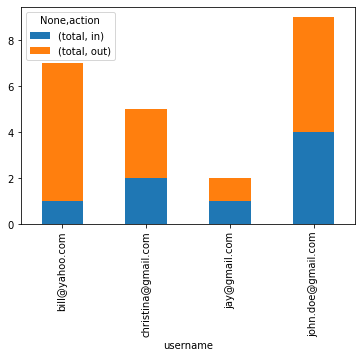

In [54]:
d8.plot(kind='bar', stacked=True)

In [57]:
d5

,username,action,total
0,john.doe@gmail.com,in,1
1,bill@yahoo.com,out,1
2,christina@gmail.com,out,1
3,john.doe@gmail.com,out,1
4,bill@yahoo.com,out,1
5,john.doe@gmail.com,out,1
6,john.doe@gmail.com,out,1
7,john.doe@gmail.com,in,1
8,john.doe@gmail.com,out,1
9,christina@gmail.com,out,1


In [58]:
d5.pivot_table('total', aggfunc='sum', index='username', columns=['action'])

action,in,out
username,,
bill@yahoo.com,1,6
christina@gmail.com,2,3
jay@gmail.com,1,1
john.doe@gmail.com,4,5
